In [111]:
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as ptl

In [80]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/var/folders/xj/3d06pn8n2_3ccmk3hcy_04040000gn/T/ipykernel_45623/3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Импорт данных

In [81]:
with open("result.json") as f:
    paths_data = json.load(f)

In [82]:
paths_data = paths_data["03-Mar-2020"]

In [83]:
paths_data.keys()

dict_keys(['Нет_Имя_судна_1', 'Arc 4_Имя_судна_2', 'Arc 7_Имя_судня_3', 'Arc 9_Ямал', 'Arc 9_Вайгач'])

In [84]:
paths_data["Arc 9_Ямал"]["path"]

{'Индига + Карские ворота': [[27, 48],
  [28, 47],
  [29, 48],
  [30, 48],
  [31, 49],
  [32, 48],
  [33, 48],
  [34, 49],
  [35, 49],
  [36, 49],
  [37, 49],
  [38, 49],
  [39, 50],
  [40, 50],
  [41, 50],
  [42, 50],
  [43, 51],
  [44, 52],
  [45, 53],
  [46, 54],
  [47, 55]],
 'Вход в Обскую губу + Новый порт': [[71, 61],
  [70, 62],
  [69, 63],
  [68, 64],
  [68, 65],
  [67, 66],
  [66, 67],
  [66, 68],
  [65, 69],
  [65, 70],
  [64, 71],
  [63, 72],
  [62, 73],
  [62, 74],
  [61, 74],
  [61, 75],
  [61, 76],
  [61, 77],
  [60, 78]],
 'Восточно-Сибирское - 1 (восток) + Рейд Певек': [[192, 42],
  [193, 43],
  [193, 44],
  [194, 45],
  [195, 45]],
 'Карское - 1 (сбор каравана) + Мыс Желания': [[78, 60],
  [79, 59],
  [79, 58],
  [79, 57],
  [79, 56],
  [79, 55],
  [79, 54],
  [79, 53],
  [79, 52],
  [79, 51],
  [79, 50],
  [79, 49],
  [79, 48],
  [79, 47],
  [79, 46],
  [79, 45],
  [79, 44],
  [78, 43],
  [78, 42]],
 'Вход в Обскую губу + Карское - 1 (сбор каравана)': [[71, 61],
  [7

In [85]:
def repl(x):
    if x == "Нет" or x == "Arc 9":
        return x
    cl = int(x.split()[-1])
    if 3 < cl  <= 6:
        return "Arc 4"
    else:
        return "Arc 7"

In [86]:
def clear_name(x):
    if "(" in x:
        x = x.split("(")[0][:-1]
    x = x.replace(" - ", " ")
    return x

In [87]:
depart_info = pd.read_excel("data.xlsx", parse_dates=True)
depart_info["Ледовый класс"] = depart_info["Ледовый класс"].apply(repl)
depart_info["Пункт начала плавания"] = depart_info["Пункт начала плавания"].str.capitalize().apply(clear_name)
depart_info["Пункт окончания плавания"] = depart_info["Пункт окончания плавания"].str.capitalize().apply(clear_name)

depart_info.head()

,Название судна,Ледовый класс,speed,Пункт начала плавания,Пункт окончания плавания,Дата начала плавания
0,ДЮК II,Arc 4,15,Новый порт,Рейд мурманска,2022-03-01
1,САРМАТ,Arc 4,15,Сабетта,Архангельск,2022-03-02
2,EDUARD TOLL,Arc 7,15,Сабетта,Рейд мурманска,2022-03-04
3,GEORGIY USHAKOV,Arc 7,15,Штокман,Пролив лонга,2022-03-07
4,RUDOLF SAMOYLOVICH,Arc 7,15,Новый порт,Устье лены,2022-03-08


In [88]:
depart_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Название судна            42 non-null     object        
 1   Ледовый класс             42 non-null     object        
 2   speed                     42 non-null     int64         
 3   Пункт начала плавания     42 non-null     object        
 4   Пункт окончания плавания  42 non-null     object        
 5   Дата начала плавания      42 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 2.1+ KB


# Создадим граф

In [89]:
graphs = {}
for key, value in paths_data.items():
    g = nx.Graph()
    for v, c in value["costs"].items():
        start, end = map(clear_name, map(str.capitalize, v.split(" + ")))
        g.add_edge(start, end, weight=10e4 if c == "Нужен ледокол" else c)
    if "Arc 9" not in key:
        key = key.split("_")[0]
    graphs[key] = g


In [98]:
graphs["Arc 9_Ямал"].nodes()

NodeView(('Индига', 'Карские ворота', 'Вход в обскую губу', 'Новый порт', 'Восточно-сибирское 1', 'Рейд певек', 'Карское 1', 'Мыс желания', 'Около новой земли', 'Окно в европу', 'Штокман', 'Берингов пролив', 'Берингово', 'Карское 3', 'Лаптевых 4', 'Устье лены', 'Пролив лонга', 'Восточно-сибирское 3', 'Восточно-сибирское 2', 'Лаптевых 2', 'Пролив санникова 1', 'Остров котельный', 'Лаптевых 3', 'Мот печора', 'Варандей-приразломное', 'Бухта север и диксон', 'Карское 2', 'Лаптевых 1', 'Кромка льда на западе', 'Терминал утренний', 'Хатангский залив', 'Дудинка', 'Рейд мурманска', 'Пролив вилькицкого 3', 'Архангельск', 'Пролив вилькицкого восток', 'Ленинградское-русановское', 'Остров врангеля', 'Мыс.наглёйнын', 'Кромка льда на востоке', 'Окно в азию', 'Таймырский залив', 'Пролив вилькицкого запад', 'Победа месторождение', 'Сабетта', 'Пролив санникова 2', 'Лескинское м-е'))

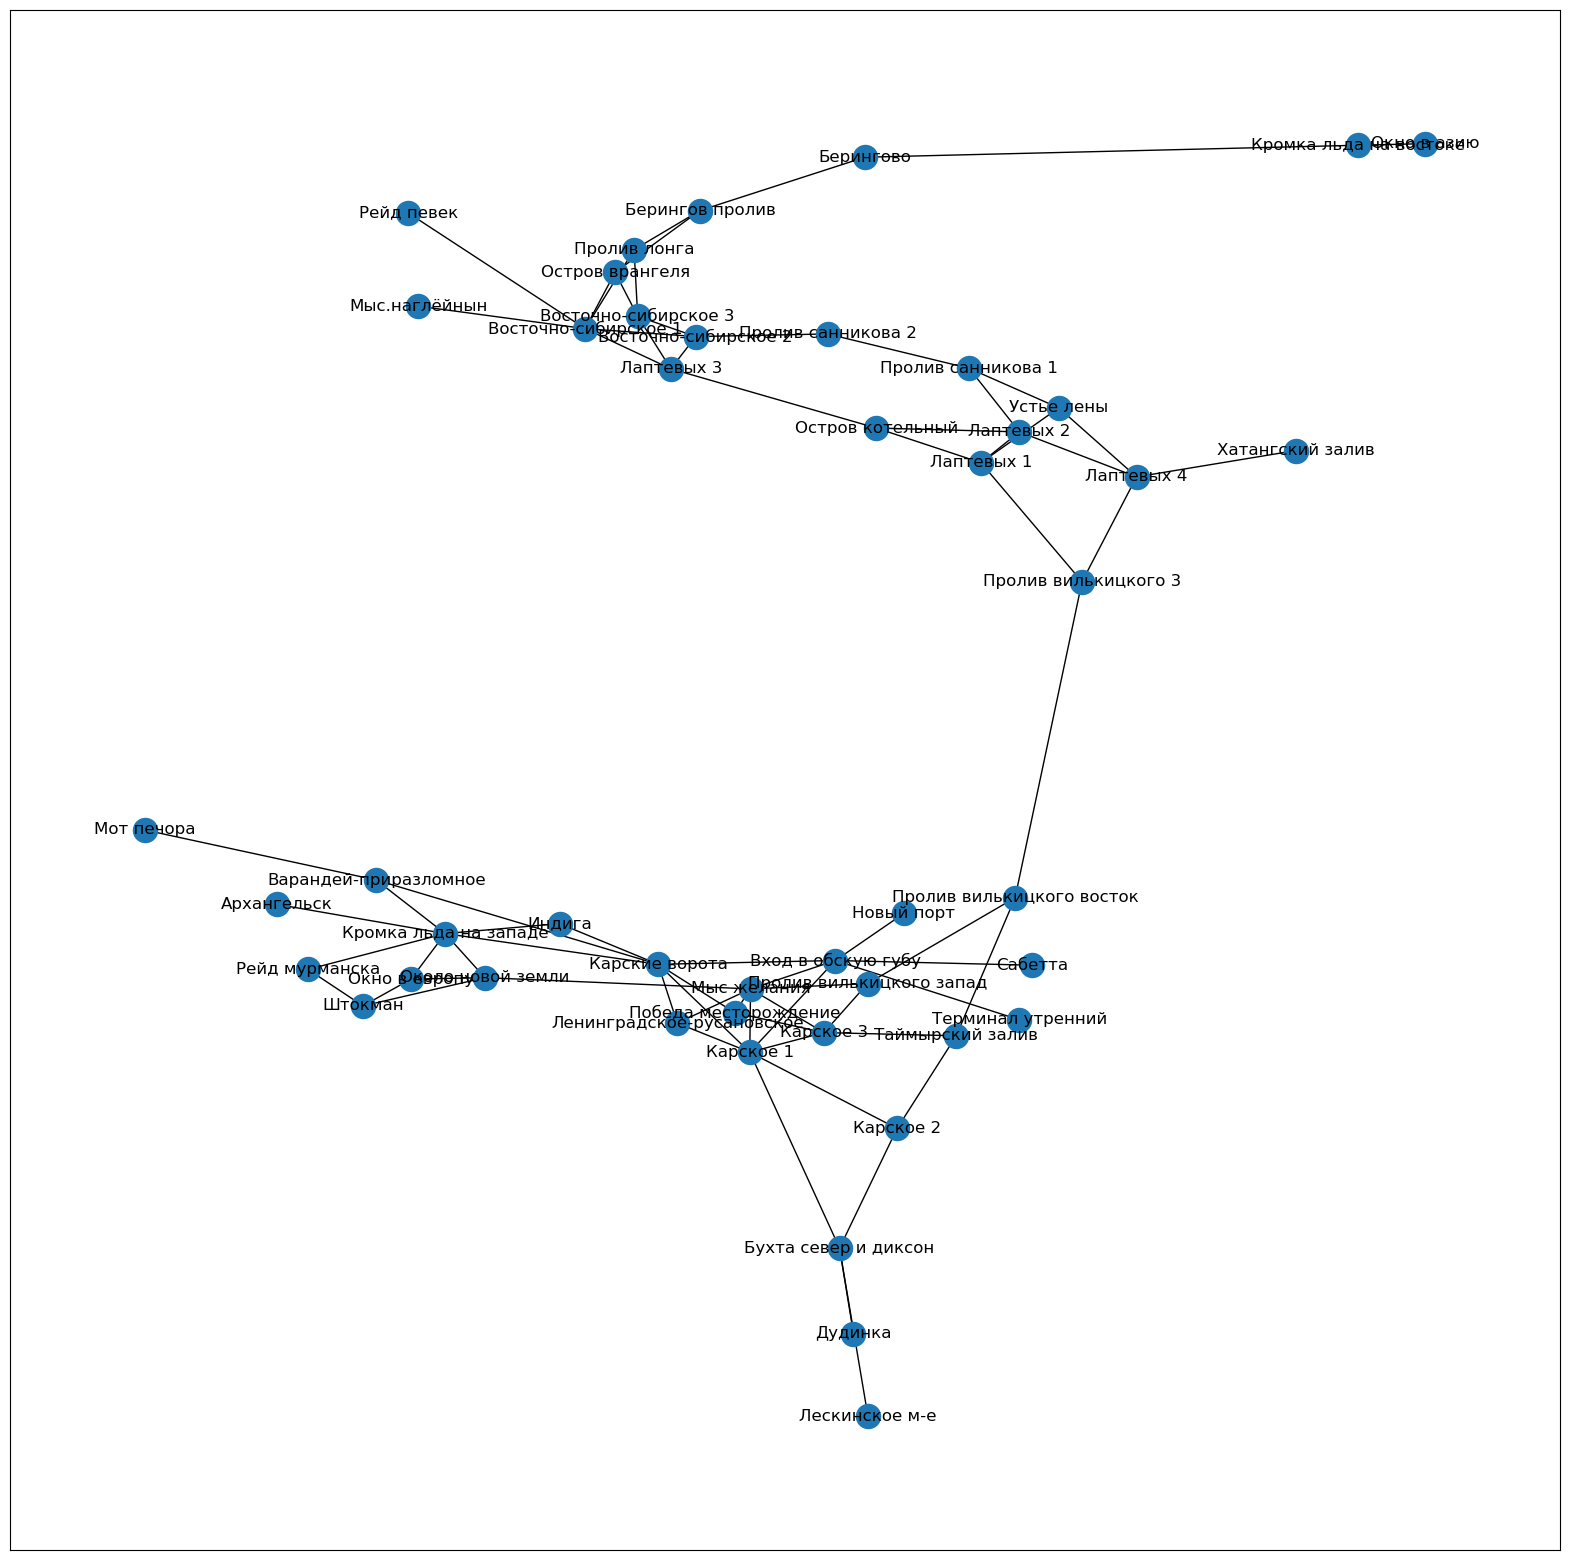

In [90]:
plt.figure(figsize=(20, 20))
nx.draw_networkx(graphs["Arc 9_Ямал"])
plt.show()

# Начальное приближение

In [91]:
def first_approximation(x):
    cl = x["Ледовый класс"]
    start, end = x["Пункт начала плавания"], x["Пункт окончания плавания"]
    return nx.dijkstra_path_length(graphs[cl], start, end)

In [92]:
depart_info["time_cost"] = depart_info.apply(first_approximation, axis=1).astype(int)
depart_info["needs_icebreaker"] = (depart_info["time_cost"] > 10e4).astype(int)
depart_info["Дата окончания плавания"] = depart_info.apply(lambda x: x["Дата начала плавания"] + pd.offsets.Hour(x["time_cost"]),axis=1)
depart_info

,Название судна,Ледовый класс,speed,Пункт начала плавания,Пункт окончания плавания,Дата начала плавания,time_cost,needs_icebreaker,Дата окончания плавания
0,ДЮК II,Arc 4,15,Новый порт,Рейд мурманска,2022-03-01,200028,1,2044-12-24 12:00:00
1,САРМАТ,Arc 4,15,Сабетта,Архангельск,2022-03-02,200025,1,2044-12-25 09:00:00
2,EDUARD TOLL,Arc 7,15,Сабетта,Рейд мурманска,2022-03-04,200028,1,2044-12-27 12:00:00
3,GEORGIY USHAKOV,Arc 7,15,Штокман,Пролив лонга,2022-03-07,700053,1,2102-01-15 21:00:00
4,RUDOLF SAMOYLOVICH,Arc 7,15,Новый порт,Устье лены,2022-03-08,400049,1,2067-10-26 17:00:00
5,VLADIMIR VORONIN,Arc 7,15,Сабетта,Пролив лонга,2022-03-12,900024,1,2124-11-13 00:00:00
6,NIKOLAY YEVGENOV,Arc 7,14,Терминал утренний,Пролив лонга,2022-03-13,900024,1,2124-11-14 00:00:00
7,CHRISTOPHE DE MARGERIE,Arc 7,14,Окно в европу,Терминал утренний,2022-03-07,200038,1,2044-12-30 22:00:00
8,BORIS VILKITSKY,Arc 7,19,Окно в европу,Терминал утренний,2022-03-07,200038,1,2044-12-30 22:00:00
9,АРКТИКА-2,Arc 4,19,Терминал утренний,Устье лены,2022-03-15,700000,1,2102-01-21 16:00:00


In [93]:
from typing import Tuple

In [94]:
with open("nodes.json", "r") as f:
    nodes = json.load(f)
for node in nodes:
    node["name"] = clear_name(node["name"]).capitalize()
    
with open("new_format_result.pkl", "rb") as f:
    new_f_data = pickle.load(f)["03-Mar-2020"]
    
lon = pd.read_excel('data/IntegrVelocity.xlsx', header=None, sheet_name='lon')
lon = lon.applymap(lambda x: x - 180 if x > 180 else x).values
lat = pd.read_excel('data/IntegrVelocity.xlsx', header=None, sheet_name='lat').values
ice = pd.read_excel('data/IntegrVelocity.xlsx', header=None, sheet_name='03-Mar-2020').values

<Axes: >

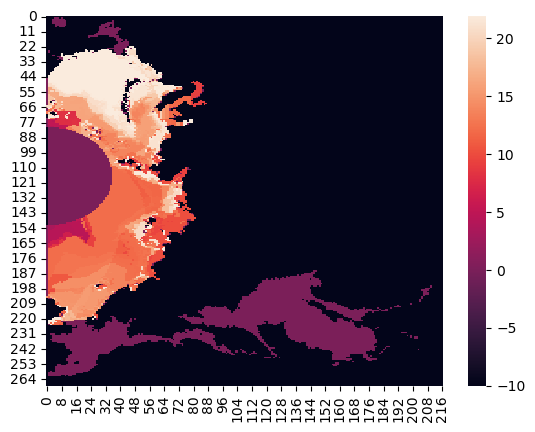

In [112]:
sns.heatmap(ice)

In [95]:
def get_point_id(point):
    for node in nodes:
        if node["name"] == point:
            return node["id"]
        

def get_path(path, name):
    new_path = []
    for i in range(len(path)):
        path[i] = get_point_id(path[i])
    
    for i in range(len(path) - 1):
        a, b = path[i], path[i + 1]
        for edge in new_f_data[name]["edges"]:
            if edge["source"] == a and edge["target"] == b:
                new_path += [(float(lat[x, y]), float(lon[x, y])) for x, y in edge["path"]][::-1]
            elif edge["source"] == b and edge["target"] == a:
                new_path += [(float(lat[x, y]), float(lon[x, y])) for x, y in edge["path"]]
    return new_path


In [19]:
def first_approximation_icebreakers(data: pd.DataFrame) -> dict:
    """Рассчитывает начальное приближение с учетом наличия ледоколов"""
    data["path"] = ""
    data["icebreaker"] = ""
    icebreakers = {
        "50 лет Победы": {
            "path": ["Пролив лонга"],
            "arrive_time": "2022-01-01",
            "start_time": "2022-01-01",
            "name": "Arc 9_Ямал",
            "speed": 22,
        },
        "Ямал": {
            "path": ["Рейд мурманска"],
            "arrive_time": "2022-01-01",
            "start_time": "2022-01-01",
            "name": "Arc 9_Ямал",
            "speed": 21,
        },
        "Таймыр":{
            "path": ["Мыс желания"],
            "arrive_time": "2022-01-01",
            "start_time": "2022-01-01",
            "name": "Arc 9_Вайгач",
            "speed": 18.5,
        },
        "Вайгач":{
            "path": ["Победа месторождение"],
            "arrive_time": "2022-01-01",
            "start_time": "2022-01-01",
            "name": "Arc 9_Вайгач",
            "speed": 18.5,
        }
    }
    
    result = {}
    
    for i, row in data.iterrows():
        start, end = row["Пункт начала плавания"], row["Пункт окончания плавания"]
        cost = 0
        # найдем подходящий ледокол (который освободится раньше всех остальных)
        selected_icebreaker = None
        for icebreaker, info in icebreakers.items():
            travel_cost = int(nx.dijkstra_path_length(graphs[info["name"]], info["path"][-1], start))
            arrive_time = pd.to_datetime(info["arrive_time"]) + pd.offsets.Hour(travel_cost)
            current_cost = (arrive_time - row["Дата начала плавания"]).total_seconds() / 3600
            
            if pd.to_datetime(row["Дата начала плавания"]) >= arrive_time:
                selected_icebreaker = icebreaker
                break
            elif selected_icebreaker is None:
                selected_icebreaker = icebreaker
                cost = current_cost
            elif selected_icebreaker is not None and current_cost < cost:
                selected_icebreaker = icebreaker
                cost = current_cost
        icebreakers[selected_icebreaker]["path"] += nx.dijkstra_path(graphs[info["name"]], info["path"][-1], start)[1:]
        icebreakers[selected_icebreaker]["path"] += nx.dijkstra_path(graphs[info["name"]], start, end)[1:]
        path_cost = int(nx.dijkstra_path_length(graphs[info["name"]], start, end))
        icebreakers[selected_icebreaker]["arrive_time"] = max(pd.to_datetime(icebreakers[selected_icebreaker]["arrive_time"]), pd.to_datetime(row["Дата начала плавания"])) + pd.offsets.Hour(path_cost)

        result[row["Название судна"]] = {
            "cost": cost + path_cost,
            "start": str(row["Дата начала плавания"]),
            "end": str(row["Дата начала плавания"] + pd.offsets.Hour(cost + path_cost)),
            "source": get_point_id(start),
            "target": get_point_id(end),
            "icebreaker": selected_icebreaker,
            "type": info["name"],
            "icebreaker_pickup_time": str(max(pd.to_datetime(icebreakers[selected_icebreaker]["arrive_time"]), pd.to_datetime(row["Дата начала плавания"])) - pd.offsets.Hour(path_cost)),
            "pickup_point_id": get_point_id(start),
            "path": get_path(nx.dijkstra_path(graphs[info["name"]], start, end), info["name"]),
        }
        
    for name, info in icebreakers.items():
        result[name] = {
            "cost": None,
            "start": info["start_time"],
            "end": str(info["arrive_time"]),
            "source": get_point_id(info["path"][0]),
            "target": get_point_id(info["path"][-1]),
            "icebreaker": name,
            "type": info["name"],
            "icebreaker_pickup_time": info["start_time"],
            "pickup_point_id": None,
            "path": get_path(info["path"], info["name"]),
            
        }
    
    return result


In [20]:
appr = first_approximation_icebreakers(depart_info.copy())
with open("first_approx_routes.json", "w") as f:
    json.dump(appr, f, ensure_ascii=False)

# Улучшающий алгоритм

Сгенерируем граф для проводки под караваном

In [47]:
from haversine import haversine

In [48]:
with open("ship_speed.json", "r") as f:
    ship_speed = json.load(f)

In [49]:
def correct_rounding(number: float) -> float:
    """Возвращает округленное значение"""
    if number > 0:
        return int(number + 0.5)
    else:
        return int(number - 0.5)
    
    
def correct_move(i: int, j: int, N: int, M: int) -> bool:
    """проверяет индексы новой клетки на корректность"""
    return 0 <= i < N and 0 <= j < M


def get_min_speed(end: str, ship_data: dict) -> float:
    """Возвращает минимальную скорость в клетке среди состава каравана"""
    min_speed = float("inf")
    for ship in ship_data:
        for key, coef in ship_speed[ship["type"]].items():
            if end in key:
                min_speed = min(min_speed, ship["speed"] * coef)
    return min_speed
        
    

In [62]:
def get_caravan_graph(ship_data: dict, ice: np.ndarray, lon: np.ndarray, lat: np.ndarray) -> nx.DiGraph:
    """по данным ледевой проходимости возвращает граф"""
    N, M = ice.shape
    G = nx.DiGraph()
    for i in range(N):
        for j in range(M):
            for x, y in [(-1, -1), (0, -1), (1, 1), (-1, 0), (1, 0), (1, -1), (0, 1), (-1, 1)]:
                if correct_move(i + x, j + y, N, M):
                    end = correct_rounding(ice[i + x, j + y])
                    if end  < 10:
                        continue
                    speed = get_min_speed(str(end), ship_data)
                    dist = haversine((lat[i, j], lon[i, j]),
                                     (lat[i + x, j + y], lon[i + x, j + y]),
                                     unit='mi')
                    weight = dist / speed
                    G.add_edge((i, j), (i + x, j + y), weight=weight)
                    G.add_edge((i + x, j + y), (i, j), weight=weight)
                    
    return G
                
    

In [66]:
ship_data = [
    {"name": "ship", "type": "Arc 4_Имя_судна_2", "speed": 14},
    {"name": "Ямал", "type": "Arc 9_Ямал", "speed": 22},
]
get_caravan_graph(ship_data, ice, lon, lat)

In [108]:
def send_icebreakers_to_ports(destination: dict) -> dict:
    """Отправляет ледоколы в порты"""
    icebreakers = {
        "50 лет Победы": {
            "path": ["Пролив лонга"],
            "arrive_time": "2022-01-01",
            "start_time": "2022-01-01",
            "name": "Arc 9_Ямал",
            "speed": 22,
        },
        "Ямал": {
            "path": ["Рейд мурманска"],
            "arrive_time": "2022-01-01",
            "start_time": "2022-01-01",
            "name": "Arc 9_Ямал",
            "speed": 21,
        },
        "Таймыр":{
            "path": ["Мыс желания"],
            "arrive_time": "2022-01-01",
            "start_time": "2022-01-01",
            "name": "Arc 9_Вайгач",
            "speed": 18.5,
        },
        "Вайгач":{
            "path": ["Победа месторождение"],
            "arrive_time": "2022-01-01",
            "start_time": "2022-01-01",
            "name": "Arc 9_Вайгач",
            "speed": 18.5,
        }
    }
    
    for name, port in destination.items():
        travel_cost = int(nx.dijkstra_path_length(graphs[icebreakers[name]["name"]], icebreakers[name]["path"][0], port))
        icebreakers[name]["arrive_time"] = str(pd.to_datetime(icebreakers[name]["arrive_time"]) + pd.offsets.Hour(travel_cost))
        icebreakers[name]["path"] += nx.dijkstra_path(graphs[icebreakers[name]["name"]], icebreakers[name]["path"][0], port)[1:]
        icebreakers[name]["port_id"] = get_point_id(port)
    
    return icebreakers

In [110]:

with open("icebreakers.json", "w") as f:
    json.dump(send_icebreakers_to_ports({
    "50 лет Победы": "Восточно-сибирское 3",
    "Ямал": "Устье лены",
    "Таймыр": "Пролив вилькицкого 3",
    "Вайгач": "Карские ворота"}), f, ensure_ascii=False)


In [119]:
ROW = 125
def same_side_distr(data: dict) -> dict:
    """старт и финиш по одну сторону"""
    res = {}
    for date, info in data.items():
        res[date] = {}
        for ship, points in info.items():
            if points["ice_border_from_start"][0] < ROW and points["ice_border_from_finish"][0] < ROW:
                res[date][ship] = 1
            elif points["ice_border_from_start"][0] >= ROW and points["ice_border_from_finish"][0] >= ROW:
                res[date][ship] = 1
            else:
                res[date][ship] = 0
    return res

def left_right(data: dict) -> dict:
    """старт слева или справа"""
    res = {}
    for date, info in data.items():
        res[date] = {}
        for ship, points in info.items():
            if points["ice_border_from_start"][0] < ROW:
                res[date][ship] = 1
            else:
                res[date][ship] = 0
    return res

In [120]:
with open("ice_graph_start_finish.json", "r") as f:
    data = json.load(f)
with open("ice_graph_start_finish_left_right.json", "w") as f:
    json.dump(left_right(data), f, ensure_ascii=False)

# Черновик

In [23]:
res = {}
for node in nodes:
    for edge in new_f_data["Arc 9_Ямал"]["edges"]:
        if edge["source"] == node["id"]:
            res[node["name"]] = edge["path"][0]
        elif edge["target"] == node["id"]:
            res[node["name"]] = edge["path"][-1]
            
with open("port_indices.json", "w") as f:
    json.dump(res, f, ensure_ascii=False )